Most played opening: Sicilian Defense: Nyezhmetdinov-Rossolimo Attack

Total White wins in Sicilian Defense: Nyezhmetdinov-Rossolimo Attack: 3
   Upsets (White lower rated): 2
   Expected wins (White higher rated): 1

All White wins in Rossolimo (sorted by Elo gap):


,round,white,white_elo,black,black_elo,elo_gap,game_url
223,4.50,"Goryachkina, Aleksandra",2528,"Kollars, Dmitrij",2647,-119,https://lichess.org/broadcast/fide-grand-swiss...
131,3.16,"Gumularz, Szymon",2590,"Oparin, Grigoriy",2660,-70,https://lichess.org/broadcast/fide-grand-swiss...
513,9.50,"Svane, Frederik",2643,"Vakhidov, Jakhongir",2521,122,https://lichess.org/broadcast/fide-grand-swiss...


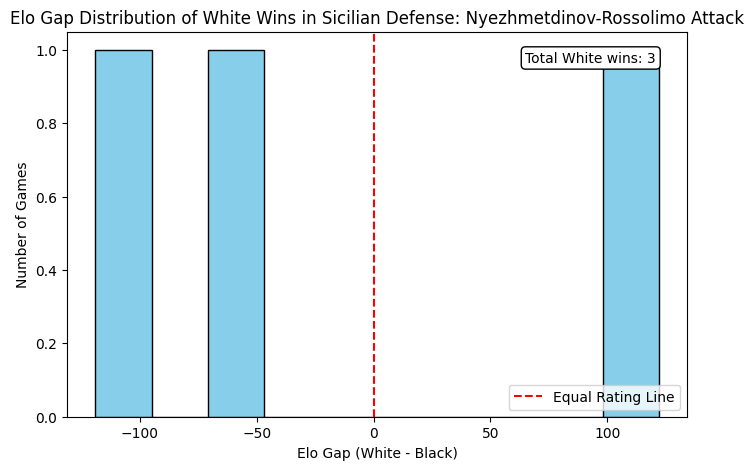

In [9]:
# 1. Top White Wins in the Rossolimo

import pandas as pd
import matplotlib.pyplot as plt

# Load processed data
games = pd.read_csv("../data/processed/games.csv")

# Step 1: Get most played opening
top_openings = games["opening"].value_counts().head(10)
top_opening_name = top_openings.index[0]
print(f"Most played opening: {top_opening_name}")

# Step 2: Filter games for this opening
opening_games = games[games["opening"] == top_opening_name]

# Step 3: Only decisive White wins
white_wins = opening_games[opening_games["result"] == "1-0"].copy()

# Step 4: Add Elo gap
white_wins["elo_gap"] = white_wins["white_elo"] - white_wins["black_elo"]

# Step 5: Sort by elo_gap
white_wins_sorted = white_wins.sort_values(by="elo_gap")

# Step 6: Count summary
num_total = len(white_wins_sorted)
num_upsets = (white_wins_sorted["elo_gap"] < 0).sum()
num_expected = (white_wins_sorted["elo_gap"] >= 0).sum()

print(f"\nTotal White wins in {top_opening_name}: {num_total}")
print(f"   Upsets (White lower rated): {num_upsets}")
print(f"   Expected wins (White higher rated): {num_expected}")

# *. Show all White wins in Rossolimo
print("\nAll White wins in Rossolimo (sorted by Elo gap):")
display(
    white_wins_sorted[
        ["round", "white", "white_elo", "black", "black_elo", "elo_gap", "game_url"]
    ]
)


# Step 7: Histogram
plt.figure(figsize=(8,5))
plt.hist(white_wins_sorted["elo_gap"], bins=10, color="skyblue", edgecolor="k")
plt.axvline(0, color="red", linestyle="--", label="Equal Rating Line")

# Add annotation with total count
plt.text(
    0.95, 0.95, 
    f"Total White wins: {num_total}", 
    transform=plt.gca().transAxes, 
    ha="right", va="top", fontsize=10, 
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3")
)

plt.title(f"Elo Gap Distribution of White Wins in {top_opening_name}")
plt.xlabel("Elo Gap (White - Black)")
plt.ylabel("Number of Games")
plt.legend()
plt.show()


Most played opening: Sicilian Defense: Nyezhmetdinov-Rossolimo Attack

Total Black wins in Sicilian Defense: Nyezhmetdinov-Rossolimo Attack: 4
   Upsets (Black lower rated): 2
   Expected wins (Black higher rated): 2

All Black wins in Rossolimo (sorted by Elo gap):


,round,white,white_elo,black,black_elo,elo_gap,game_url
230,4.57,"Amin, Bassem",2636,Divya Deshmukh,2478,158,https://lichess.org/broadcast/fide-grand-swiss...
498,9.35,"Volokitin, Andrei",2628,Aditya Mittal,2589,39,https://lichess.org/broadcast/fide-grand-swiss...
217,4.44,"Hammer, Jon Ludvig",2618,"Sadhwani, Raunak",2658,-40,https://lichess.org/broadcast/fide-grand-swiss...
157,3.42,"Vakhidov, Jakhongir",2521,"Harikrishna, Pentala",2704,-183,https://lichess.org/broadcast/fide-grand-swiss...


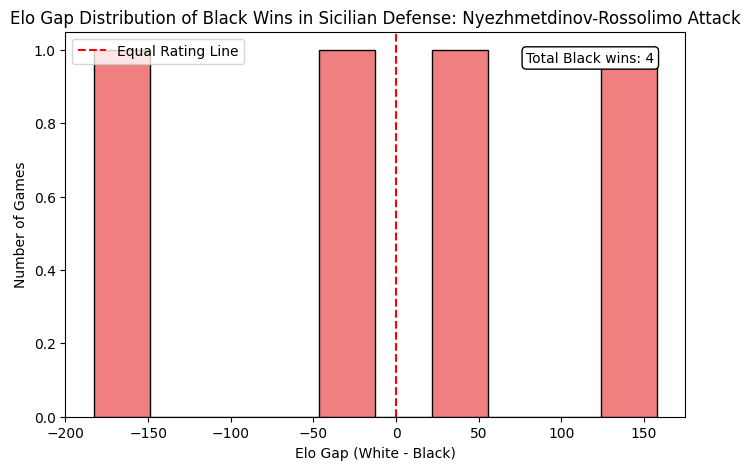

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load processed data
games = pd.read_csv("../data/processed/games.csv")

# Step 1: Get most played opening
top_openings = games["opening"].value_counts().head(10)
top_opening_name = top_openings.index[0]
print(f"Most played opening: {top_opening_name}")

# Step 2: Filter games for this opening
opening_games = games[games["opening"] == top_opening_name]

# Step 3: Only decisive Black wins
black_wins = opening_games[opening_games["result"] == "0-1"].copy()

# Step 4: Add Elo gap (positive = White higher rated → upset for Black)
black_wins["elo_gap"] = black_wins["white_elo"] - black_wins["black_elo"]

# Step 5: Sort by elo_gap
black_wins_sorted = black_wins.sort_values(by="elo_gap", ascending=False)

# Step 6: Count summary
num_total = len(black_wins_sorted)
num_upsets = (black_wins_sorted["elo_gap"] > 0).sum()   # White higher rated
num_expected = (black_wins_sorted["elo_gap"] <= 0).sum() # Black higher rated or equal

print(f"\nTotal Black wins in {top_opening_name}: {num_total}")
print(f"   Upsets (Black lower rated): {num_upsets}")
print(f"   Expected wins (Black higher rated): {num_expected}")

# *. Show all Black wins in Rossolimo
print("\nAll Black wins in Rossolimo (sorted by Elo gap):")
display(
    black_wins_sorted[
        ["round", "white", "white_elo", "black", "black_elo", "elo_gap", "game_url"]
    ]
)


# Step 7: Histogram
plt.figure(figsize=(8,5))
plt.hist(black_wins_sorted["elo_gap"], bins=10, color="lightcoral", edgecolor="k")
plt.axvline(0, color="red", linestyle="--", label="Equal Rating Line")

# Add annotation with total count
plt.text(
    0.95, 0.95, 
    f"Total Black wins: {num_total}", 
    transform=plt.gca().transAxes, 
    ha="right", va="top", fontsize=10, 
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3")
)

plt.title(f"Elo Gap Distribution of Black Wins in {top_opening_name}")
plt.xlabel("Elo Gap (White - Black)")
plt.ylabel("Number of Games")
plt.legend()
plt.show()
